# Tutorial 1: Introduction to Python

In the first [exercise](https://git.rwth-aachen.de/introduction-to-robotics-course/introduction-to-robotics-2023/-/tree/main/01_IntroductionToPython) you got introduced to the fundamentals of `Python` (variables, data types, operators, decision structures, loops, functions and modules). In order to consolidate and extend the knowledge aquired, the following tutorial tasks should be solved / implemented.

## Task 1.1

The **forward_kinematics** function from the [forward_kinematics module](https://git.rwth-aachen.de/introduction-to-robotics-course/introduction-to-robotics-2023/-/blob/main/01_IntroductionToPython/forward_kinematics.py) is implemented for an manipulator of **n links** and **n+1 revolute joints** that starts from an **initial position** with all joint rotations $\theta_i=0$.

Implement a function named **fk_task_1** inside the [forward_kinematics module](https://git.rwth-aachen.de/introduction-to-robotics-course/introduction-to-robotics-2023/-/blob/main/01_IntroductionToPython/forward_kinematics.py) that ***returns*** a list which contains for each time step all joint coordinates $x_i$ and $y_i$ for a manipulator (**n links** and **n+1 revolute joints**) with an initial joint rotation that is described by the current rotations $\theta_{i,t}$ for joint i at time t and the desired incremental joint rotations $\Delta\theta_{i,t+1}$ for joint i at time t + 1. The base link is rotating around the given point $[x_0 = 0, y_0 = 1]$. 

Test the implemented function inside this jupyter notebook in the following cells. Use the given structure to

1. **Import** necessary modules.
2. **Define** the **parameters** needed to test the 'fk_task_1' function.
    - base link coordinates $x_0$ and $y_0$
    - link lengths $a_i=[1,1,1,1,1]$
    - initial joint roations $\theta_{i,t=0}=[90,0,0,0,0]$ in degree
    - incremental change of joint rotation $\Delta\theta_{i,t=1} = [0,0,90,-30,45]$
3. **Call** the 'fk_task_1' **function** and save the return values under appropriate named variables.
4. **Create** a **plot** containing the initial manipulator position and the position after incremental rotation. Choose for each time step a different color.

**Hints:** 
- Use the the data type [array](https://numpy.org/doc/stable/reference/arrays.ndarray.html) from the [numpy package](https://numpy.org/doc/stable/) to define the variables which contain a sequence of values. That allows you to use arithmetic operators directly on the variables.
- To implement **fk_task_1** you can make use of already existing functions inside of the [forward_kinematics module](https://git.rwth-aachen.de/introduction-to-robotics-course/introduction-to-robotics-2023/-/blob/main/01_IntroductionToPython/forward_kinematics.py).



In [9]:
# Use this cell to import the necessary modules
import matplotlib.pyplot as plt
from forward_kinematics import *
import numpy as np

In [23]:
# Use this cell to define the gemoetry and rotation parameters
x_0 = 0
y_0 = 1
list_a = np.array([1,1,1,1,1])
list_theta_initial = np.array([90,0,0,0,0])
list_delta_theta_1 = [np.array([0,0,90,-30,45])]

In [24]:
# function
def fk_task_1(x_0, y_0, list_a, list_theta_initial, list_delta_theta_allTimeSteps):

    joint_x_coords_initial, joint_y_coords_initial = fk_getJointCoords(x_0, y_0, list_a, list_theta_initial)
    joint_x_coords_allTimeSteps = [joint_x_coords_initial]
    joint_y_coords_allTimeSteps = [joint_y_coords_initial]

    list_theta_act = list_theta_initial
    for list_delta_theta_actTime in list_delta_theta_allTimeSteps:
        list_theta_act = list_theta_act+list_delta_theta_actTime
        joint_x_coords, joint_y_coords = fk_getJointCoords(x_0, y_0, list_a, list_theta_act)
        joint_x_coords_allTimeSteps.append(joint_x_coords)
        joint_y_coords_allTimeSteps.append(joint_y_coords)

    return joint_x_coords_allTimeSteps, joint_y_coords_allTimeSteps

In [26]:
# Use this cell to call the function 'fk_task_1'
joint_x_coords_allTimeSteps, joint_y_coords_allTimeSteps = fk_task_1(x_0, y_0, list_a, list_theta_initial, list_delta_theta_1)

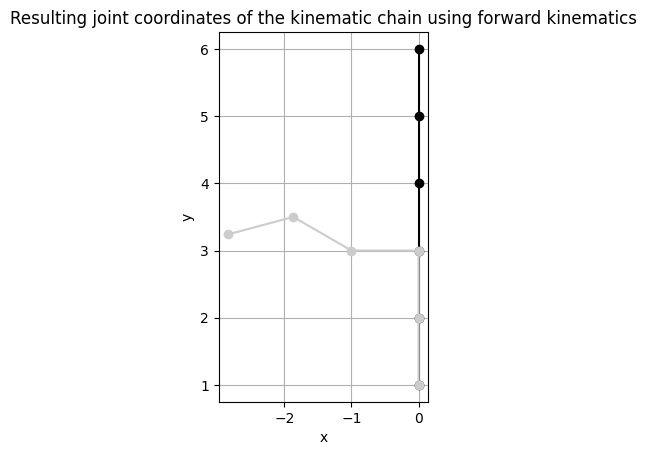

In [27]:
# Use this cell to plot the initial maniplator position and the position after incremental rotation
plt.figure(facecolor='white')
ax = plt.gca()
ax.set_aspect('equal')
plt.grid(True)
n_timeSteps = len(joint_x_coords_allTimeSteps)
grey_factor = np.linspace(0,0.8,n_timeSteps)
for i in range(0,n_timeSteps):
    plt.plot(joint_x_coords_allTimeSteps[i], joint_y_coords_allTimeSteps[i], '-o', color=[grey_factor[i],grey_factor[i],grey_factor[i]])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Resulting joint coordinates of the kinematic chain using forward kinematics')
plt.show()

## Task 1.2

After implementing the **fk_task_1** function and teststing it for one time step, respectively one increment, test the function now for several time steps. The goal is now to reach the rotation position $\theta_{i,1}$ from **Task 1.1** in 5 evenly spaced steps and generate one plot which contains the resulting configuration of the arm manipulator for all time steps. 

In [29]:
# Calculation of the incremental rotation steps to reach the final rotation position
n_increments = 5
theta_final = list_delta_theta_1[0]
list_delta_theta = [theta_final/n_increments for i in range(1,n_increments+1)]

In [30]:
# Calling the function 'fk_test_1'
joint_x_coords_allTimeSteps, joint_y_coords_allTimeSteps = fk_task_1(x_0, y_0, list_a, list_theta_initial, list_delta_theta)

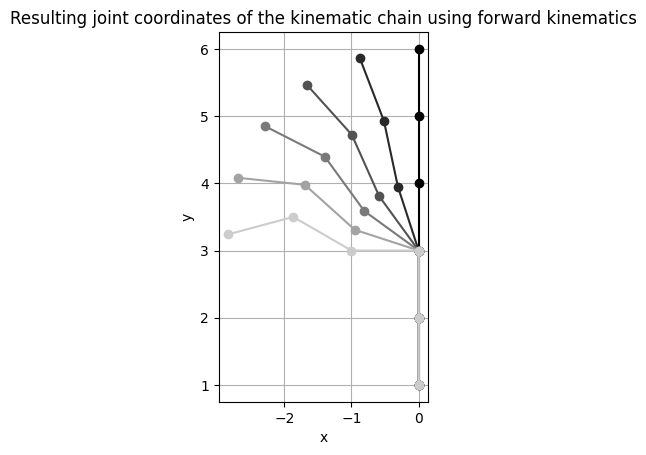

In [31]:
# Plot here one plot which contains for each time step the corresponding arm manipulator position # Use this cell to plot the initial maniplator position and the position after incremental rotation
plt.figure(facecolor='white')
ax = plt.gca()
ax.set_aspect('equal')
plt.grid(True)
n_timeSteps = len(joint_x_coords_allTimeSteps)
grey_factor = np.linspace(0,0.8,n_timeSteps)
for i in range(0,n_timeSteps):
    plt.plot(joint_x_coords_allTimeSteps[i], joint_y_coords_allTimeSteps[i], '-o', color=[grey_factor[i],grey_factor[i],grey_factor[i]])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Resulting joint coordinates of the kinematic chain using forward kinematics')
plt.show()